# **Projeto 3: Segmentação de Clientes em E-commerce**

## Certificação de Análise de Dados, Laboratória e IBM

---
## **Introdução**
---

A UK Merch é uma empresa jovem, com apenas 13 meses, que se dedica à venda de vestuário no atacado, ou seja, vende em quantidades relativamente grandes (geralmente 20 peças ou mais) e oferece um preço mais competitivo que o varejo convencional. Seus clientes são empresas menores que abastecem seu estoque comprando da UK Merch.

A alguns meses a empresa decidiu expandir sua operação para outros países da Europa, mas ainda não sabem se essa decisão foi acertada, dado que não acompanharam seus indicadores ao longo desse período, muito menos conhecem quem são e onde estão seus melhores clientes.

Perguntas como: 
- Quanto vendem em média por mês? 
- Quantas vendas realizam em cada mês?
- Qual é o mês com maior número de vendas? 
- Quais são os clientes mais importantes?
- Qual é o valor médio que os clientes gastam? 
- Qual porcentagem de clientes que voltam a comprar? 
- Como estas informações se rearranjam ao separar os dados entre UK e demais países?

Para alcançar essas respostas inicialmente irei revisar a qualidade dos dados. Em seguida, levantarei as respostas para as perguntas pontuadas acima e/ou outras que se pautarem como importantes ao longo da análise. Para entender a retenção de clientes usarei a análise de coorte e por fim, segmentarei os clientes baseada em Recência, Frequência e Valor gasto (RFM) e, desta forma, será possível recomendar estratégias específicas para a UK Merch efetuar com seus clientes.

#### Objetivos de aprendizagem

##### Ao resolver este projeto, você será capaz de:

- **Pré-processar os dados:** identificar dados duplicados, em branco ou fora do domínio (por exemplo, valores negativos quando não aplicável) para preparar seus dados para análise posterior.
- **Organizar os dados:** alterar os tipos de dados para o formato correto;
- **Manipular dados:** agrupar, consolidar e analisar dados para ver comparações, padrões e tendências. Além disso, poder conectar duas ou mais fontes de dados;
- **Visualizar dados:** construir gráficos de linhas e barras para visualizar informações, resumir descobertas, encontrar padrões ou comparar diferentes séries de dados.
- **Fazer uma análise de coorte:** organizar as informações para formar coortes de clientes de acordo com a data de entrada no produto/serviço. Realizar cálculos e formatar as informações para encontrar mapas de calor. Identificar pontos de fuga.
- **Segmentar clientes com o modelo RFM:** entender a regra de Pareto e utilizá-la para identificar os principais clientes do negócio, a fim de concentrar esforços e obter o maior retorno (80/20).


### Fontes consultadas: 

- [**Python Graph Gallery**](https://www.python-graph-gallery.com/)

- [**An RFM Analysis with Python**](https://towardsdatascience.com/an-rfm-customer-segmentation-with-python-cf7be647733d), Wenling Yao

- [**Introduction to Customer Segmentation in Python**](https://www.datacamp.com/tutorial/introduction-customer-segmentation-python), Avinash Navlani

- [**Segmentación de clientes: cómo llegar efectivamente a nuestro público objetivo**](https://www.zendesk.com.mx/blog/segmentacion-de-clientes/), Douglas da Silva

- [**O que é Análise de Cohort (coorte) e como aplicá-la em Python**](https://spacedata.com.br/analise-de-cohort-coorte/), Dai

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import datetime as dt
import seaborn as sns
import squarify #treemap
import matplotlib as mpl
from datetime import datetime as dti
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('vendas-por-fatura.csv')
df

,N° da fatura,Data da fatura,ID Cliente,País,Quantidade,Valor
0,548370,3/30/2021 16:14:00,15528.0,United Kingdom,123,"229,33"
1,575767,11/11/2021 11:11:00,17348.0,United Kingdom,163,"209,73"
2,C570727,10/12/2021 11:32:00,12471.0,Germany,-1,"-1,45"
3,549106,4/6/2021 12:08:00,17045.0,United Kingdom,1,"39,95"
4,573112,10/27/2021 15:33:00,16416.0,United Kingdom,357,"344,83"
...,...,...,...,...,...,...
25948,C556518,6/13/2021 10:53:00,16794.0,United Kingdom,-2,"-12,70"
25949,553060,5/13/2021 10:44:00,15826.0,United Kingdom,488,"720,00"
25950,577049,11/17/2021 13:58:00,17397.0,United Kingdom,104,"298,78"
25951,550122,4/14/2021 12:39:00,12931.0,United Kingdom,1176,"1488,00"


A seguir analiso o tipo de dado existente em cada coluna, pois é possível que algum dado tenha sido lido com formato errado. Como podemos ver abaixo o campo _Data da Fatura_ foi lido como __object__ (ou seja, texto) e, deste modo, precisamos alterar seu formato para __datetime__ (data e hora), o qual corresponde com as informações que possuimos nessa coluna.

Além disso, essa etapa também possibilita uma análise de campos vazios em cada uma das colunas. O dataframe apresenta um total de 25953 linhas e o campo _ID Cliente_ apresenta apenas 22.229 linhas com informações, as demais estão vazias, ou seja, há 3.724 faturas que não estão ligadas a nenhum cliente.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25953 entries, 0 to 25952
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   N° da fatura    25953 non-null  object 
 1   Data da fatura  25953 non-null  object 
 2   ID Cliente      22229 non-null  float64
 3   País            25953 non-null  object 
 4   Quantidade      25953 non-null  int64  
 5   Valor           25953 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB


---
## **Limpeza dos Dados**
---

* Remoção dos Valores Negativos;
* Remoção de registros duplicados;
* Remoção de registros com informações ausentes;

Nesta etapa iremos efetuar a limpeza do nosso banco de dados e manteremos apenas dados que agreguem informação a nossa análise.

####  Remover Valores Negativos

Osvalores negativos serão removidos por corresponderem a estornos e não serão necessários para a análise a proposta. Assim, em seguida descobriremos quais linhas possuem número menor que 0 (negativo).

Originalmente essa etapa foi idealizada para a coluna Valor, onde valores negativos correspondem a estornos, no entanto, a coluna valor está em formato str e não permite ser transformada em número por causa da vírgula. Para resolver esse impasse observei que a coluna Quantidade também é negativa quando o valor é negativo e esta está em formato numérico (int64, ou seja, número inteiro), por isso o filtro será aplicado nesta coluna.

Criaremos uma mascara booleana, onde a variável *ValorNegativo* receberá um valor booleano (True ou False) de acordo com a seguinte condição: Quantidade < 0. *True* significa que a condição foi atendida e que essa linha precisa ser removida, *False* indica que a linha permanecerá no df.

Por fim, a remoção é feita ao efetuar um __drop__ do dataframe original a partir da variável criada, ou seja, as linhas que possuem true na variável são excluídas do dataframe.

In [4]:
# Criar a máscara booleana
ValorNegativo = df[df['Quantidade'] < 0].index

In [5]:
# Remover as linhas com valores negativos
df.drop(ValorNegativo, inplace=True)

A proxima etapa da limpeza será a remoção de registros duplicados, novamente o drop entra em ação com sua função nativa de remoção de duplicados, __drop_duplicates__.

In [6]:
# Remover registros duplicados
df.drop_duplicates(inplace=True)

Por fim, remover as linhas que possuem dados ausentes. Essa etapa está diretamente relacionada à análise inicial que fizemos sobre a ausência de IDs de Clientes, logo removeremos um total de 3.724 linhas.

In [7]:
# Remover todas as linhas que possuem algum dado ausente
df.dropna(inplace=True)

Após o termino da análise é hora de visualizar os dados resultantes:

In [8]:
print('A base de dados apresenta {} registros de compras (linhas) e {} variáveis (colunas)'.format(df.shape[0], df.shape[1]))

A base de dados apresenta 18566 registros de compras (linhas) e 6 variáveis (colunas)


In [9]:
df.dtypes

N° da fatura       object
Data da fatura     object
ID Cliente        float64
País               object
Quantidade          int64
Valor              object
dtype: object

### Alterando o tipo dos dados

In [10]:
# Data para o tipo datetime (dia e hora)
df['Data da fatura'] = pd.to_datetime(df['Data da fatura'])

In [11]:
#Substituindo vírgula por ponto e alterando o tipo da coluna para float
df['Valor'] = df['Valor'].str.replace(',', '.').astype(float)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18566 entries, 0 to 25951
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   N° da fatura    18566 non-null  object        
 1   Data da fatura  18566 non-null  datetime64[ns]
 2   ID Cliente      18566 non-null  float64       
 3   País            18566 non-null  object        
 4   Quantidade      18566 non-null  int64         
 5   Valor           18566 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 1015.3+ KB


---
## **Panorama das métricas de vendas por país**
---

Inicialmente a ideia aqui é entender qual o faturamento da empresa por país, quais países apresentam o maior número de clientes e qual o número total de vendas em cada país.

In [13]:
exploracao = df.groupby(by='País', as_index=False).agg({'ID Cliente': pd.Series.nunique,
                                                        'N° da fatura': pd.Series.nunique,
                                                        'Valor': ['min', 'max', 'mean', 'sum'], 
                                                        'Quantidade': 'sum'})
exploracao.columns = ['Pais', 'Clientes', 'Vendas', 'ValorMinimo', 'ValorMaximo', 'ValorMedia', 'Faturamento', 'ItensVendidos']
exploracao = exploracao.sort_values(by='Faturamento', ascending=False)
exploracao.style.format({"ValorMinimo": "£{0:,.2f}", 
                          "ValorMaximo": "£{0:,.2f}", 
                          "ValorMedia": "£{0:,.2f}",
                          "Faturamento":"£{0:,.2f}"}).bar(subset=["Faturamento",], color='#B2B1B9').bar(subset=["Clientes",], color='#B2B1B9')

,Pais,Clientes,Vendas,ValorMinimo,ValorMaximo,ValorMedia,Faturamento,ItensVendidos
35,United Kingdom,3921,16649,£0.00,"£168,469.60",£438.26,"£7,308,391.55",4269472
23,Netherlands,9,95,£0.00,"£20,277.92","£3,004.70","£285,446.34",200937
10,EIRE,3,260,£1.45,"£16,774.72","£1,017.42","£265,545.90",140525
14,Germany,94,457,£3.00,"£9,341.26",£500.80,"£228,867.14",119263
13,France,87,389,£4.63,"£8,895.76",£535.96,"£209,024.05",111472
0,Australia,9,57,£61.20,"£22,775.93","£2,430.20","£138,521.31",84209
30,Spain,30,90,£13.25,"£4,146.34",£684.19,"£61,577.11",27951
32,Switzerland,21,51,£4.95,"£6,207.67","£1,106.74","£56,443.95",30083
3,Belgium,25,98,£34.00,"£1,491.59",£420.37,"£41,196.34",23237
31,Sweden,8,36,£8.50,"£5,296.96","£1,066.06","£38,378.33",36083


In [14]:
# Criar função para pegar o mês e o ano de cada transação
def get_month(x): 
    return dt.datetime(x.year, x.month, 1)

In [15]:
# Aplicar a função get_month na coluna Data da Fatura e armazenar o resultado na nova coluna intitulada Mes-Ano:
df['Mes-Ano'] = df['Data da fatura'].apply(get_month)
df

,N° da fatura,Data da fatura,ID Cliente,País,Quantidade,Valor,Mes-Ano
0,548370,2021-03-30 16:14:00,15528.0,United Kingdom,123,229.33,2021-03-01
1,575767,2021-11-11 11:11:00,17348.0,United Kingdom,163,209.73,2021-11-01
3,549106,2021-04-06 12:08:00,17045.0,United Kingdom,1,39.95,2021-04-01
4,573112,2021-10-27 15:33:00,16416.0,United Kingdom,357,344.83,2021-10-01
5,576630,2021-11-16 08:38:00,13816.0,Germany,91,199.98,2021-11-01
...,...,...,...,...,...,...,...
25945,579252,2021-11-28 16:47:00,17450.0,United Kingdom,432,1034.40,2021-11-01
25946,574908,2021-11-07 15:37:00,16009.0,United Kingdom,28,82.76,2021-11-01
25949,553060,2021-05-13 10:44:00,15826.0,United Kingdom,488,720.00,2021-05-01
25950,577049,2021-11-17 13:58:00,17397.0,United Kingdom,104,298.78,2021-11-01


### Faturamento e Vendas Mensais

In [16]:
vendaMensal = df.groupby(by='Mes-Ano', as_index=False).agg({'N° da fatura': pd.Series.nunique, 'ID Cliente': pd.Series.nunique, 'Quantidade': 'sum', 'Valor': 'sum'})
vendaMensal.columns = ['Mes-Ano', 'Vendas', 'Clientes', 'ProdutosVendidos', 'Faturamento']
vendaMensal = vendaMensal.sort_values(by='Mes-Ano')

vendaMensal.style.format({"Faturamento": "£{0:,.2f}"}).bar(subset=["Faturamento",], color='#B2B1B9')

,Mes-Ano,Vendas,Clientes,ProdutosVendidos,Faturamento
0,2020-12-01 00:00:00,1400,885,312280,"£572,713.89"
1,2021-01-01 00:00:00,987,741,349147,"£569,445.04"
2,2021-02-01 00:00:00,998,758,265638,"£447,137.35"
3,2021-03-01 00:00:00,1321,974,348544,"£595,500.76"
4,2021-04-01 00:00:00,1149,856,292225,"£469,200.36"
5,2021-05-01 00:00:00,1555,1056,373685,"£678,594.56"
6,2021-06-01 00:00:00,1393,991,363699,"£661,213.69"
7,2021-07-01 00:00:00,1331,949,369432,"£600,091.01"
8,2021-08-01 00:00:00,1281,935,398938,"£645,343.90"
9,2021-09-01 00:00:00,1756,1266,544899,"£952,838.38"


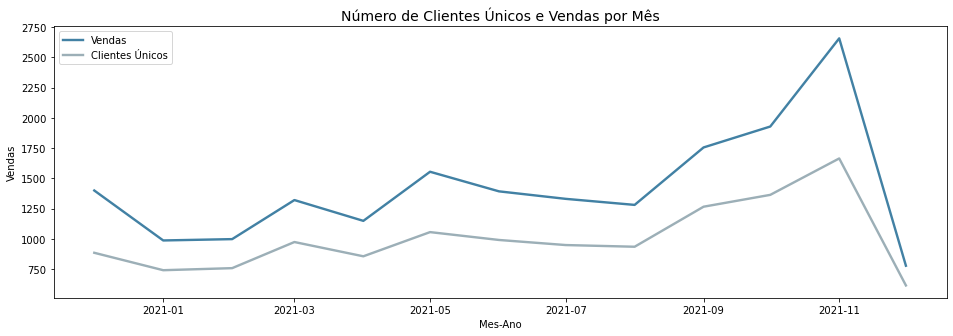

In [17]:
plt.figure(figsize = (16,5))

plt.title('Número de Clientes Únicos e Vendas por Mês', fontsize = 14)
sns.lineplot(x='Mes-Ano', y='Vendas', data=vendaMensal, lw=2.4, color='#4281A4')
sns.lineplot(x='Mes-Ano', y='Clientes', data=vendaMensal, lw=2.4, color='#9CAFB7')
plt.legend(labels=['Vendas', 'Clientes Únicos'])

O número de vendas segue proporcional ao número de clientes únicos que acessam nossos produtos, o que me leva a crer que: quanto mais pessoas distintas acessarem nossos produtos mais vendas efetuaremos. Ou seja, em geral, não são os mesmos clientes que compram várias vezes, mas sim que a expressiva maioria das nossas vendas são efetuadas para clientes diversos.

O mês de Novembro/2021 apresentou um pico no número de vendas. OBS: A queda brusca no mês seguinte, Dezembro/2021, é aqui atribuida ao fato de que esta análise observou apenas os 15 primeiros dias do mês de dezembro, dado que os dados vão apenas até esta data.

<AxesSubplot:title={'center':'Número de Produtos Vendidos Mensalmente'}, xlabel='Mes-Ano', ylabel='ProdutosVendidos'>

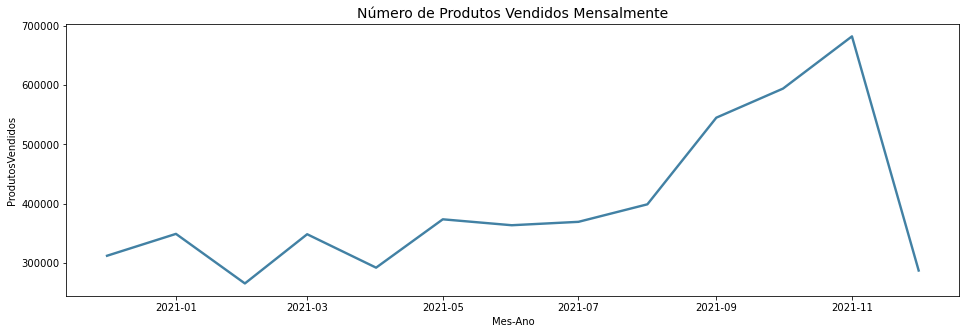

In [18]:
plt.figure(figsize = (16,5))
plt.title('Número de Produtos Vendidos Mensalmente', fontsize = 14)
sns.lineplot(data=vendaMensal, x='Mes-Ano', y='ProdutosVendidos', lw=2.4, color='#4281A4')

---
## **Análise de Cohort**
---

A análise de cohort é uma ferramenta poderosa para entender a retenção de clientes ao longo do tempo, o tempo médio que um dado grupo de clientes (ou seja, clientes que compartilham alguma(s) características em comum) permanecem fiés à sua empresa, ponto que auxilia na construção de segmentações e criação de campanhas personalizadas para cada segmento.

O cohort aqui analisado corresponde à data da primeira compra. A partir dessa informação será possível acessar qual a porcentagem de clientes que voltam a comprar na empresa e reconhecer períodos nos quais a empresa teve maiores perdas de clientes.

O intervalo de tempo aqui analisado será o mensal, na etapa anterior coletei o mês e o ano de cada transação (o dia será atribuído automaticamente como 01), com o auxílio de uma função, e armazenei essas informações em uma nova coluna (Mes-Ano). A partir desse dado agrupei abaixo todos os clientes pela menor data de Ano-Mes que possuem associada ao seu ID, ou seja, o mês e ano de sua primeira compra na empresa, essa informação corresponde ao Coorte de cada cliente e será armazenada na variável de mesmo nome (Coorte). 

### Preparação dos dados

In [19]:
df['Coorte'] = df.groupby('ID Cliente')['Mes-Ano'].transform('min')
df

,N° da fatura,Data da fatura,ID Cliente,País,Quantidade,Valor,Mes-Ano,Coorte
0,548370,2021-03-30 16:14:00,15528.0,United Kingdom,123,229.33,2021-03-01,2021-03-01
1,575767,2021-11-11 11:11:00,17348.0,United Kingdom,163,209.73,2021-11-01,2021-02-01
3,549106,2021-04-06 12:08:00,17045.0,United Kingdom,1,39.95,2021-04-01,2021-04-01
4,573112,2021-10-27 15:33:00,16416.0,United Kingdom,357,344.83,2021-10-01,2021-10-01
5,576630,2021-11-16 08:38:00,13816.0,Germany,91,199.98,2021-11-01,2021-10-01
...,...,...,...,...,...,...,...,...
25945,579252,2021-11-28 16:47:00,17450.0,United Kingdom,432,1034.40,2021-11-01,2020-12-01
25946,574908,2021-11-07 15:37:00,16009.0,United Kingdom,28,82.76,2021-11-01,2021-07-01
25949,553060,2021-05-13 10:44:00,15826.0,United Kingdom,488,720.00,2021-05-01,2021-05-01
25950,577049,2021-11-17 13:58:00,17397.0,United Kingdom,104,298.78,2021-11-01,2021-11-01


In [20]:
# Construindo os dados para plotar cohort
def get_date(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

In [21]:
# Obter o ano e o mês da variável Mes-Ano (mês e ano de cada transação do cliente):
invoice_year, invoice_month, _ = get_date(df, 'Mes-Ano')
# Obter o ano e o mês da variável Coorte (mês e ano da primeira compra do cliente):
cohort_year, cohort_month, _ = get_date(df, 'Coorte')
# Obter a diferença entre o ano de uma dada fatura e o ano do coorte do cliente:
year_diff = invoice_year - cohort_year
# Obter a diferença entre o mês de uma dada fatura e o mês do coorte do cliente:
month_diff = invoice_month - cohort_month
# Calcular a diferença em meses entre os valores anteriores (o +1 é para que o primeiro mês seja marcado como 1 em vez de 0)
df['CoorteIndex'] = year_diff * 12 + month_diff + 1

df

,N° da fatura,Data da fatura,ID Cliente,País,Quantidade,Valor,Mes-Ano,Coorte,CoorteIndex
0,548370,2021-03-30 16:14:00,15528.0,United Kingdom,123,229.33,2021-03-01,2021-03-01,1
1,575767,2021-11-11 11:11:00,17348.0,United Kingdom,163,209.73,2021-11-01,2021-02-01,10
3,549106,2021-04-06 12:08:00,17045.0,United Kingdom,1,39.95,2021-04-01,2021-04-01,1
4,573112,2021-10-27 15:33:00,16416.0,United Kingdom,357,344.83,2021-10-01,2021-10-01,1
5,576630,2021-11-16 08:38:00,13816.0,Germany,91,199.98,2021-11-01,2021-10-01,2
...,...,...,...,...,...,...,...,...,...
25945,579252,2021-11-28 16:47:00,17450.0,United Kingdom,432,1034.40,2021-11-01,2020-12-01,12
25946,574908,2021-11-07 15:37:00,16009.0,United Kingdom,28,82.76,2021-11-01,2021-07-01,5
25949,553060,2021-05-13 10:44:00,15826.0,United Kingdom,488,720.00,2021-05-01,2021-05-01,1
25950,577049,2021-11-17 13:58:00,17397.0,United Kingdom,104,298.78,2021-11-01,2021-11-01,1


In [22]:
slice_ = ['1']
dados_coorte = df.groupby(
    ['Coorte', 'CoorteIndex'])['ID Cliente'].apply(pd.Series.nunique).reset_index()

coorte = dados_coorte.pivot_table(index = 'Coorte',
                                       columns = 'CoorteIndex',
                                       values = 'ID Cliente')

coorte

CoorteIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
Coorte,,,,,,,,,,,,,
2020-12-01,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2021-01-01,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2021-02-01,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
2021-03-01,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2021-04-01,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2021-05-01,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
2021-06-01,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-01,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-01,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
tamanho_coorte = coorte.iloc[:,0]
retencao = coorte.divide(tamanho_coorte, axis=0)
retencao.round(3)

CoorteIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
Coorte,,,,,,,,,,,,,
2020-12-01,1.0,0.366,0.323,0.384,0.363,0.398,0.363,0.349,0.354,0.395,0.374,0.503,0.266
2021-01-01,1.0,0.221,0.266,0.230,0.321,0.288,0.247,0.242,0.300,0.326,0.365,0.118,NaN
2021-02-01,1.0,0.187,0.187,0.284,0.271,0.247,0.253,0.279,0.247,0.305,0.068,NaN,NaN
2021-03-01,1.0,0.150,0.252,0.199,0.223,0.168,0.268,0.230,0.279,0.086,NaN,NaN,NaN
2021-04-01,1.0,0.213,0.203,0.210,0.197,0.227,0.217,0.260,0.073,NaN,NaN,NaN,NaN
2021-05-01,1.0,0.190,0.173,0.173,0.208,0.232,0.264,0.095,NaN,NaN,NaN,NaN,NaN
2021-06-01,1.0,0.174,0.157,0.264,0.231,0.335,0.095,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-01,1.0,0.181,0.207,0.223,0.271,0.112,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-01,1.0,0.207,0.249,0.243,0.124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
retencao.index = pd.to_datetime(retencao.index).strftime('%Y-%m')

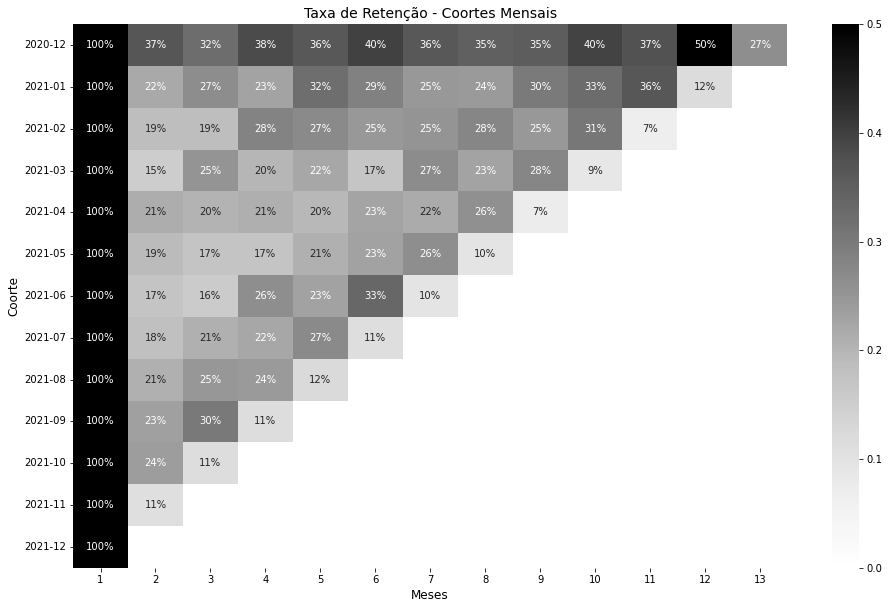

In [25]:
plt.figure(figsize = (16,10))
plt.title('Taxa de Retenção - Coortes Mensais', fontsize = 14)
sns.heatmap(data = retencao, 
            annot = True,
            fmt = '.0%', 
            vmin = 0.0,
            vmax = 0.5,
            cmap = "Greys")
plt.ylabel('Coorte', fontsize = 12)
plt.xlabel('Meses', fontsize = 12)
plt.yticks( rotation='360')
plt.show()

Essa análise expões de maneira bastante compreensível alguns padrões durante nosso ciclo de interações com nossos clientes. Por exemplo, vemos que o percentual, na maioria dos meses, cai entre 70% e 80% do primeiro mês ao segundo, com exceção do grupo de 2021/1, onde a queda chega a alcançar 90%, porém isso se deve ao fato de que os dados analisados compreendem apenas os 15 primeiros dias desse mês. 

O primeiro coorte (2020-12) é o mais forte, a taxa de permanência dos clientes é mais elevada que os demais, o que nos leva a questionar: quais outras características (além do primeiro mês de compra) esses clientes compartilham? Como a maioria desses usuários foi adquirida? Houve uma campanha de marketing específica que os trouxe? Eles aproveitaram uma promoção na inscrição? As respostas a essas perguntas informariam futuros esforços de marketing e produtos a serem pensados e aplicados em coortes futuros.

Já o coorte de 2021-05 é o que apresenta taxa de retenção mais baixa Esta mesma situação ocorre em 08/2011, especialmente no terceiro e quarto mês, o que houve nesses períodos? 

### Analisar separadamente os contextos do UK e dos demais países

Preparando o banco de dados para análises comparativas entre os países, sobretudo entre o Reino Unido (local de origem da empresa) e os demais países para os quais a empresa tem tentado expandir ao longo do último ano.

In [26]:
# Criar uma colunda informando se a fatura corresponde a uma venda para clientes do Reino Unido (True) ou não (False)
df['Vendas UK'] = np.where(df['País']!= 'United Kingdom', False, True)
df

,N° da fatura,Data da fatura,ID Cliente,País,Quantidade,Valor,Mes-Ano,Coorte,CoorteIndex,Vendas UK
0,548370,2021-03-30 16:14:00,15528.0,United Kingdom,123,229.33,2021-03-01,2021-03-01,1,True
1,575767,2021-11-11 11:11:00,17348.0,United Kingdom,163,209.73,2021-11-01,2021-02-01,10,True
3,549106,2021-04-06 12:08:00,17045.0,United Kingdom,1,39.95,2021-04-01,2021-04-01,1,True
4,573112,2021-10-27 15:33:00,16416.0,United Kingdom,357,344.83,2021-10-01,2021-10-01,1,True
5,576630,2021-11-16 08:38:00,13816.0,Germany,91,199.98,2021-11-01,2021-10-01,2,False
...,...,...,...,...,...,...,...,...,...,...
25945,579252,2021-11-28 16:47:00,17450.0,United Kingdom,432,1034.40,2021-11-01,2020-12-01,12,True
25946,574908,2021-11-07 15:37:00,16009.0,United Kingdom,28,82.76,2021-11-01,2021-07-01,5,True
25949,553060,2021-05-13 10:44:00,15826.0,United Kingdom,488,720.00,2021-05-01,2021-05-01,1,True
25950,577049,2021-11-17 13:58:00,17397.0,United Kingdom,104,298.78,2021-11-01,2021-11-01,1,True


In [27]:
grupo = df.groupby(df['Vendas UK'])
dfuk = grupo.get_group(True)
df_expansao = grupo.get_group(False)

#### Análise para o Reino Unido
---

In [28]:
dfuk

,N° da fatura,Data da fatura,ID Cliente,País,Quantidade,Valor,Mes-Ano,Coorte,CoorteIndex,Vendas UK
0,548370,2021-03-30 16:14:00,15528.0,United Kingdom,123,229.33,2021-03-01,2021-03-01,1,True
1,575767,2021-11-11 11:11:00,17348.0,United Kingdom,163,209.73,2021-11-01,2021-02-01,10,True
3,549106,2021-04-06 12:08:00,17045.0,United Kingdom,1,39.95,2021-04-01,2021-04-01,1,True
4,573112,2021-10-27 15:33:00,16416.0,United Kingdom,357,344.83,2021-10-01,2021-10-01,1,True
6,538125,2020-12-09 15:46:00,18225.0,United Kingdom,16,30.00,2020-12-01,2020-12-01,1,True
...,...,...,...,...,...,...,...,...,...,...
25945,579252,2021-11-28 16:47:00,17450.0,United Kingdom,432,1034.40,2021-11-01,2020-12-01,12,True
25946,574908,2021-11-07 15:37:00,16009.0,United Kingdom,28,82.76,2021-11-01,2021-07-01,5,True
25949,553060,2021-05-13 10:44:00,15826.0,United Kingdom,488,720.00,2021-05-01,2021-05-01,1,True
25950,577049,2021-11-17 13:58:00,17397.0,United Kingdom,104,298.78,2021-11-01,2021-11-01,1,True


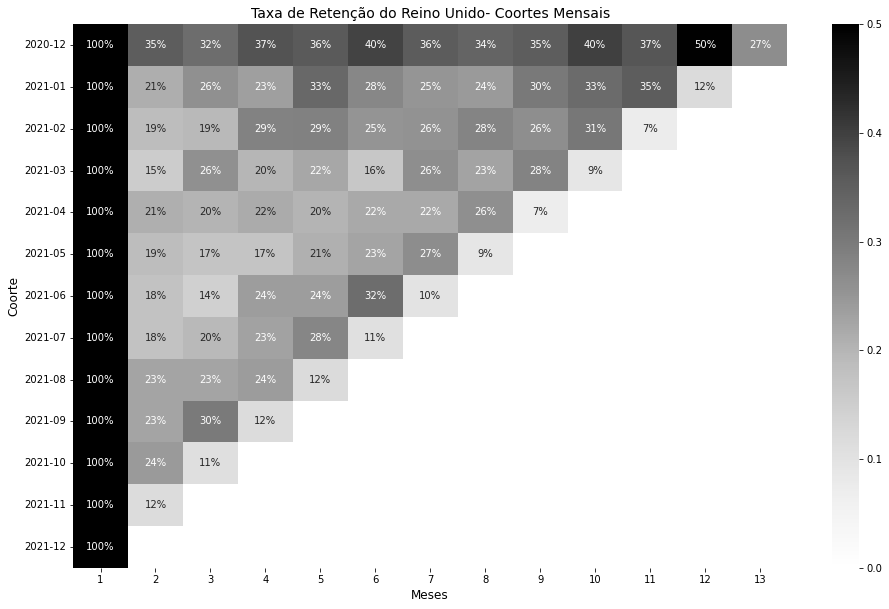

In [29]:
dados_coorteuk = dfuk.groupby(
    ['Coorte', 'CoorteIndex'])['ID Cliente'].apply(pd.Series.nunique).reset_index()

coorteuk = dados_coorteuk.pivot_table(index = 'Coorte',
                                       columns = 'CoorteIndex',
                                       values = 'ID Cliente')

tamanho_coorteuk = coorteuk.iloc[:,0]
retencaouk = coorteuk.divide(tamanho_coorteuk, axis=0)
retencaouk.round(3)

retencaouk.index = pd.to_datetime(retencaouk.index).strftime('%Y-%m')

plt.figure(figsize = (16,10))
plt.title('Taxa de Retenção do Reino Unido- Coortes Mensais', fontsize = 14)
sns.heatmap(data = retencaouk, 
            annot = True,
            fmt = '.0%', 
            vmin = 0.0,
            vmax = 0.5,
            cmap = "Greys")
plt.ylabel('Coorte', fontsize = 12)
plt.xlabel('Meses', fontsize = 12)
plt.yticks( rotation='360')
plt.show()

#### Análise para os demais países

In [30]:
df_expansao

,N° da fatura,Data da fatura,ID Cliente,País,Quantidade,Valor,Mes-Ano,Coorte,CoorteIndex,Vendas UK
5,576630,2021-11-16 08:38:00,13816.0,Germany,91,199.98,2021-11-01,2021-10-01,2,False
9,570651,2021-10-11 13:34:00,14911.0,EIRE,86,321.35,2021-10-01,2020-12-01,11,False
13,575581,2021-11-10 11:53:00,12659.0,France,105,91.68,2021-11-01,2021-11-01,1,False
27,576083,2021-11-14 08:22:00,17404.0,Sweden,1060,1238.48,2021-11-01,2020-12-01,12,False
30,537026,2020-12-03 16:35:00,12395.0,Belgium,528,346.10,2020-12-01,2020-12-01,1,False
...,...,...,...,...,...,...,...,...,...,...
25890,542147,2021-01-26 10:02:00,12782.0,Portugal,237,683.93,2021-01-01,2020-12-01,2,False
25908,547493,2021-03-23 12:06:00,12818.0,Austria,929,1542.08,2021-03-01,2021-03-01,1,False
25910,571201,2021-10-14 12:28:00,14937.0,Channel Islands,240,649.92,2021-10-01,2021-08-01,3,False
25931,552875,2021-05-12 09:41:00,12621.0,Germany,104,186.52,2021-05-01,2020-12-01,6,False


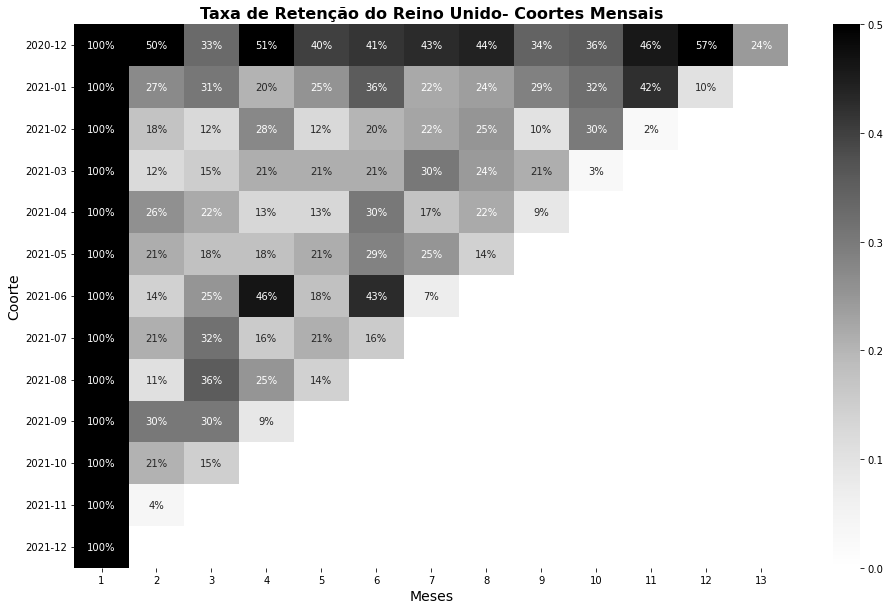

In [31]:
dados_coorte_expansao = df_expansao.groupby(
    ['Coorte', 'CoorteIndex'])['ID Cliente'].apply(pd.Series.nunique).reset_index()

coorte_expansao = dados_coorte_expansao.pivot_table(index = 'Coorte',
                                       columns = 'CoorteIndex',
                                       values = 'ID Cliente')

tamanho_coorte_expansao = coorte_expansao.iloc[:,0]
retencao_expansao = coorte_expansao.divide(tamanho_coorte_expansao, axis=0)
retencao_expansao.round(3)

retencao_expansao.index = pd.to_datetime(retencao_expansao.index).strftime('%Y-%m')

plt.figure(figsize = (16,10))
plt.title('Taxa de Retenção do Reino Unido- Coortes Mensais', fontsize = 16, fontweight='bold')
sns.heatmap(data = retencao_expansao, 
            annot = True,
            fmt = '.0%', 
            vmin = 0.0,
            vmax = 0.5,
            cmap = "Greys")
plt.ylabel('Coorte', fontsize = 14)
plt.xlabel('Meses', fontsize = 14)
plt.yticks( rotation='360')
plt.show()

---
## **Análise RFM**
---

Segundo a literatura consultada as categorias de clientes mais recorrentes são: melhores clientes, leais, potenciais, novos, precisam de atenção e perdidos. A partir desses e ao analisar minha base de dados optei por adequar e, quando necessário, criar perfis específicos que auxiliassem a compreender o cenário e traçar métodos de abordagem mais adequados para cada um deles. Deste modo, optei por manter 9 categorias (**Segmento de clientes**), definidas a partir de suas **Atividades** e que demanam ações particulares, **Dica acionável**.

Segmento de clientes | Atividade | Dica acionável
:--------- | :------: | -------:
**Melhores clientes** | Comprou recentemente, compra com frequência e gasta muito! | Recompense-as. Ofereça novidades em primeira mão. Certamente promoverão sua marca.
**Leais** | Gasta um bom dinheiro e com frequência e respondem bem às promoções. | Ofereça produtos de maior valor. Peça avaliações. Envolva-as.
**Potenciais leais** | Clientes recentes, gastaram uma boa quantia e compraram mais de uma vez. | Ofereça programa de fidelidade e recomende outros produtos.
**Novos** | Não possui histórico e comprou recentemente. | Comece a construir um relacionamento. Envie e-mails personalizados incentivando-as a adquirir novos produtos.
**Promissores** | Comprou recentemente e mais de uma vez, mas em geral não gasta muito. | Comece a construir um relacionamento. Ofereça produtos de maior valor com base em seu histórico de compras.
**Precisa de atenção!** | Gastava muito dinheiro e comprava com frequência. Mas a muito tempo não compra. Precisa trazê-las de volta! | Experimente ofertar promoções por tempo limitado. Faça recomendações individualizadas com base em transações anteriores.
**Prestes a hibernar** | Comprou a muito tempo, uma ou poucas vezes e gastou abaixo da média. Vai perdê-los se não for reativado. | Divulgue novidades, recomende produtos de baixo custo e com desconto, reconecte-se.
**Hibernando** | Recência, frequência e valores monetários abaixo da média. Vai perdê-los se não for reativado. | Divulgue novidades e recomende promoções.
**Perdidos** | Não compram a muito tempo, compraram poucas vezes e gastaram pouco. | Ignore-os ou reviva seu interesse com campanhas publicitárias.

Com um esboço dos segmentos construído segui para a segmentação em si. Para isso agrupei as informações por cliente e fiz um recorte dos dados para manusear apenas as variáveis necessárias nessa análise, que seria: a data da primeira e última compra, a frequência de compra (uma contagem do número de faturas para o mesmo ID) e o valor total que a pessoa já gastou na empresa. Em seguida renomeio as colunas apenas por quesitos de organização e didática.

In [32]:
rfm = df.groupby(['ID Cliente']).agg({'Data da fatura': ['max', 'min'], 'N° da fatura': 'count', 'Valor': 'sum'})
rfm.columns = ['UltimaCompra', 'PrimeiraCompra', 'Frequencia', 'Valor']

rfm

,UltimaCompra,PrimeiraCompra,Frequencia,Valor
ID Cliente,,,,
12346.0,2021-01-18 10:01:00,2021-01-18 10:01:00,1,77183.60
12347.0,2021-12-07 15:52:00,2020-12-07 14:57:00,7,4310.00
12348.0,2021-09-25 13:13:00,2020-12-16 19:09:00,4,1797.24
12349.0,2021-11-21 09:51:00,2021-11-21 09:51:00,1,1757.55
12350.0,2021-02-02 16:01:00,2021-02-02 16:01:00,1,334.40
...,...,...,...,...
18280.0,2021-03-07 09:52:00,2021-03-07 09:52:00,1,180.60
18281.0,2021-06-12 10:53:00,2021-06-12 10:53:00,1,80.82
18282.0,2021-12-02 11:43:00,2021-08-05 13:35:00,2,178.05


In [33]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4339 entries, 12346.0 to 18287.0
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   UltimaCompra    4339 non-null   datetime64[ns]
 1   PrimeiraCompra  4339 non-null   datetime64[ns]
 2   Frequencia      4339 non-null   int64         
 3   Valor           4339 non-null   float64       
dtypes: datetime64[ns](2), float64(1), int64(1)
memory usage: 169.5 KB


Prontinho! As 18.566 linhas de antes tornam-se apenas 4.339. O que aconteceu? As 18.566 linhas representam todas as vendas válidas da empresa (após limpeza dos dados), muitas delas efetuadas para o mesmo cliente. Já as 4.339 representam os dados de cada cliente único da empresa. Deste modo, é possível acessar os clientes de maior valor para a empresa (os que gastam mais e compram sempre), os clientes ideais.

Para o cáculo da Recência subtrairemos da data de realização da análise (hoje) pelo dia da última compra efetuada pelo cliente. Com isso teremos a quantos dias todos os clientes realizaram sua última compra e saberemos se ele comprou a pouco tempo ou se não compra a muito tempo.

In [34]:
hoje = dti.now()
rfm['Recencia'] = (hoje - rfm['UltimaCompra']).dt.days
rfm

,UltimaCompra,PrimeiraCompra,Frequencia,Valor,Recencia
ID Cliente,,,,,
12346.0,2021-01-18 10:01:00,2021-01-18 10:01:00,1,77183.60,532
12347.0,2021-12-07 15:52:00,2020-12-07 14:57:00,7,4310.00,208
12348.0,2021-09-25 13:13:00,2020-12-16 19:09:00,4,1797.24,281
12349.0,2021-11-21 09:51:00,2021-11-21 09:51:00,1,1757.55,225
12350.0,2021-02-02 16:01:00,2021-02-02 16:01:00,1,334.40,516
...,...,...,...,...,...
18280.0,2021-03-07 09:52:00,2021-03-07 09:52:00,1,180.60,484
18281.0,2021-06-12 10:53:00,2021-06-12 10:53:00,1,80.82,386
18282.0,2021-12-02 11:43:00,2021-08-05 13:35:00,2,178.05,213


Agora com todos os dados para os cáculos do RFM:

- Recência = intervalo entre a última compra e hoje
- Frequência = o número de compras efetuadas pelo cliente
- Valor monetário = quanto o cliente já gastou com os produtos da empresa

Após essa etapa, calcula-se a Recência/Frequência/Valor criando subdivisões a partir dos quartis de cada uma dessas variáveis. A títul ode exemplo, um cliente excelente excelente pertence em recência ao quartil 1 (porque comprou há pouco tempo), em frequência ao quartil 4 (porque compra com muita frequência) e em valor monetário ao quartil 4 (porque está entre os que mais gastam), ou seja, 144. Para criar a codificação, procuramos o quartil de cada cliente em cada uma das variáveis e depois juntamos esses valores em um "código" que resume seu perfil, RFM.

In [35]:
rfm["RecenciaScore"] = pd.cut(rfm["Recencia"], 
                                       bins=[-1, 
                                         np.percentile(rfm["Recencia"], 25), 
                                             np.percentile(rfm["Recencia"], 50), 
                                             np.percentile(rfm["Recencia"], 75), 
                                             rfm["Recencia"].max()], 
                                       labels=[1, 2, 3, 4]).astype("int")

In [36]:
rfm["FrequenciaScore"] = pd.cut(rfm["Frequencia"], 
                                       bins=[-1, 
                                         np.percentile(rfm["Frequencia"], 25), 
                                             np.percentile(rfm["Frequencia"], 50), 
                                             np.percentile(rfm["Frequencia"], 75), 
                                             rfm["Frequencia"].max()], 
                                       labels=[1, 2, 3, 4]).astype("int")

In [37]:
rfm["ValorScore"] = pd.cut(rfm["Valor"], 
                                       bins=[-1, 
                                         np.percentile(rfm["Valor"], 25), 
                                             np.percentile(rfm["Valor"], 50), 
                                             np.percentile(rfm["Valor"], 75), 
                                             rfm["Valor"].max()], 
                                       labels=[1, 2, 3, 4]).astype("int")

In [38]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4339 entries, 12346.0 to 18287.0
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   UltimaCompra     4339 non-null   datetime64[ns]
 1   PrimeiraCompra   4339 non-null   datetime64[ns]
 2   Frequencia       4339 non-null   int64         
 3   Valor            4339 non-null   float64       
 4   Recencia         4339 non-null   int64         
 5   RecenciaScore    4339 non-null   int64         
 6   FrequenciaScore  4339 non-null   int64         
 7   ValorScore       4339 non-null   int64         
dtypes: datetime64[ns](2), float64(1), int64(5)
memory usage: 305.1 KB


In [39]:
rfm['RFM'] = rfm.RecenciaScore.astype(str) + rfm.FrequenciaScore.astype(str) + rfm.ValorScore.astype(str)
rfm.reset_index(inplace=True)
rfm

,ID Cliente,UltimaCompra,PrimeiraCompra,Frequencia,Valor,Recencia,RecenciaScore,FrequenciaScore,ValorScore,RFM
0,12346.0,2021-01-18 10:01:00,2021-01-18 10:01:00,1,77183.60,532,4,1,4,414
1,12347.0,2021-12-07 15:52:00,2020-12-07 14:57:00,7,4310.00,208,1,4,4,144
2,12348.0,2021-09-25 13:13:00,2020-12-16 19:09:00,4,1797.24,281,3,3,4,334
3,12349.0,2021-11-21 09:51:00,2021-11-21 09:51:00,1,1757.55,225,2,1,4,214
4,12350.0,2021-02-02 16:01:00,2021-02-02 16:01:00,1,334.40,516,4,1,2,412
...,...,...,...,...,...,...,...,...,...,...
4334,18280.0,2021-03-07 09:52:00,2021-03-07 09:52:00,1,180.60,484,4,1,1,411
4335,18281.0,2021-06-12 10:53:00,2021-06-12 10:53:00,1,80.82,386,4,1,1,411
4336,18282.0,2021-12-02 11:43:00,2021-08-05 13:35:00,2,178.05,213,1,2,1,121
4337,18283.0,2021-12-06 12:02:00,2021-01-06 14:14:00,16,2094.88,209,1,4,4,144


Para "legendar" cada código criei uma classificação prévia a partir do conjunto de dados e contruí uma tabela paralela. Nesse dataframe há todas as combinações de RFM para cada categoria de cliente e para inserí-la no dataframe principal fiz um merge usando como chave o RFM.

In [41]:
classificacao = pd.read_csv('rmf-classes.csv')
classificacao

,Categoria,rfm
0,Novos,111
1,Novos,112
2,Novos,113
3,Novos,114
4,Promissores,121
...,...,...
56,Precisa de atenção!,434
57,Hibernando,441
58,Hibernando,442
59,Precisa de atenção!,443


In [42]:
classificacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Categoria  61 non-null     object
 1   rfm        61 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [43]:
# Transformei a coluna 'rfm' em formato string para igualá-la à coluna RMF do dataframe principal e assim conseguir efetuar o merge.
classificacao['rfm'] = classificacao['rfm'].astype(str)

In [44]:
rfm1 = rfm.merge(classificacao, left_on='RFM', right_on='rfm', how='left')
rfm1 = rfm1.drop(['rfm'] , axis=1)

In [45]:
rfm1

,ID Cliente,UltimaCompra,PrimeiraCompra,Frequencia,Valor,Recencia,RecenciaScore,FrequenciaScore,ValorScore,RFM,Categoria
0,12346.0,2021-01-18 10:01:00,2021-01-18 10:01:00,1,77183.60,532,4,1,4,414,Perdidos
1,12347.0,2021-12-07 15:52:00,2020-12-07 14:57:00,7,4310.00,208,1,4,4,144,Melhores clientes
2,12348.0,2021-09-25 13:13:00,2020-12-16 19:09:00,4,1797.24,281,3,3,4,334,Potenciais leais
3,12349.0,2021-11-21 09:51:00,2021-11-21 09:51:00,1,1757.55,225,2,1,4,214,Novos
4,12350.0,2021-02-02 16:01:00,2021-02-02 16:01:00,1,334.40,516,4,1,2,412,Perdidos
...,...,...,...,...,...,...,...,...,...,...,...
4334,18280.0,2021-03-07 09:52:00,2021-03-07 09:52:00,1,180.60,484,4,1,1,411,Perdidos
4335,18281.0,2021-06-12 10:53:00,2021-06-12 10:53:00,1,80.82,386,4,1,1,411,Perdidos
4336,18282.0,2021-12-02 11:43:00,2021-08-05 13:35:00,2,178.05,213,1,2,1,121,Promissores
4337,18283.0,2021-12-06 12:02:00,2021-01-06 14:14:00,16,2094.88,209,1,4,4,144,Melhores clientes


In [46]:
rfm_grupos = rfm1.groupby(['Categoria'], as_index=False).agg({'ID Cliente': pd.Series.nunique, 'Valor': 'sum'})
rfm_grupos.columns = ['Categoria', 'Clientes', 'Faturamento']
rfm_grupos = rfm_grupos.sort_values(by='Faturamento', ascending=False)
rfm_grupos.style.format({"Faturamento": "£{0:,.2f}"}).bar(subset=["Faturamento",], color='#B2B1B9')

,Categoria,Clientes,Faturamento
2,Melhores clientes,450,"£4,331,489.24"
1,Leais,858,"£2,189,448.01"
4,Perdidos,1355,"£640,322.42"
5,Potenciais leais,419,"£625,387.11"
6,Precisa de atenção!,145,"£455,528.57"
7,Promissores,444,"£395,236.82"
0,Hibernando,299,"£145,593.45"
3,Novos,369,"£128,402.28"


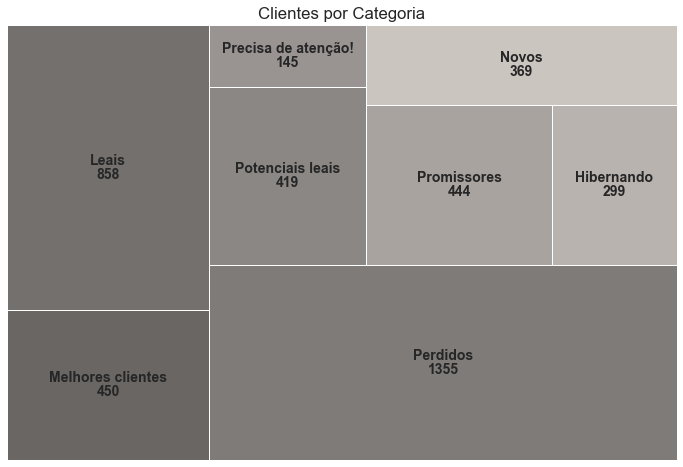

In [47]:
color = 'white'
mpl.rcParams['text.color'] = color
mpl.rcParams['font.size'] = 14
mpl.rcParams['font.weight'] = 'bold'
some_colors = ['#696663', '#73706D', '#7E7B78', '#8B8784', '#999491', '#A8A39F', '#B9B3AF', '#CBC5C0', '#DFD9D3']

plt.figure(figsize = (12,8))
sns.set_style(style="whitegrid")
squarify.plot(sizes=rfm_grupos['Clientes'], label=rfm_grupos['Categoria'], value=rfm_grupos['Clientes'], color=some_colors,
              alpha=1, pad=False).set(title='Clientes por Categoria')
plt.axis('off')
plt.show()

---
## **Considerações Finais**
---

A MK Merch possui um expressivo volume de vendas e um mercado promissor, contudo necessita investir na criação de campanhas de marketing e experiências personalizadas ao seu tipo (segmento) de cliente. Uma maior fidelização dos clientes aumentará o faturamento da empresa, dado que são estes clientes, leais e melhores clientes, que mais lhe dão retorno financeiro.

O alcance de clientes em outros países parece ter correlação direta com a distância geográfica deste país com o Reino Unido, mais do que questões culturais (tais como o idioma, como sugerida pelos proprietários, dado que países como a França e Alemanha possuem números expressivos de clientes. Ainda, ao tratar estes clientes como um único grupo, este reflete a mesma proporção de segmentação dos clientes do UK. Ponto este que me reforça que a loja pode alcançar um maior número de clientes novos ou fidelizações ao dedicar mais atenção a campanhas publicitárias direcionadas a cada segmento, independente de seu país de origem.

Há presença de faturas com valor igual a 0. A empresa está ciente desse fato? Isso corresponde a erros no registro, doações ou alguma forma de compensação? Isso precisa ser verificado.

O pico das vendas parece estar concentrado entre novembro e dezembro, porém não temos dados suficientes no mês de dezembro de 2021 para confirmar possível tendência sazonal. Ainda que dois segmentos específicos respondam por quase 90% do faturamento da empresa, o número de vendas tende a aumentar a medida que mais clientes acessam sua loja. O número de vendas tende a aumentar a medida que mais clientes 